<h4>Milestone 1 Deliverable</h4>
Clay Elmore
<br>
Grace Kopp
<br><br>
This is the first milestone for our project "Stochastic Energy Market Price Forecasting with Recurrent Neural Networks." In this implementation we have solidified the initial architecture of our neural network as a long short-term memory (LSTM) recurrent neural network architecture. We've implemented it on one row of our time series data.



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


Training: 225 	Testing: 111


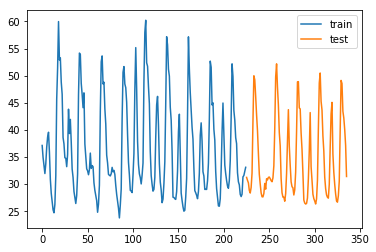

In [2]:
dataframe = pd.read_csv('../prices/prices.csv')
dataset = dataframe.values[0]
dataset = dataset.astype('float32')

# make a training and testing set
frac_train = 0.67

# split into train and test sets
train_size = int(len(dataset) * frac_train)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print('Training:',len(train), '\tTesting:',len(test))
t_train = np.arange(train_size)
t_test = np.arange(test_size) + train_size
plt.plot(t_train,train)
plt.plot(t_test,test)
plt.legend(['train','test'])
plt.show()

In [3]:
# dataset = (np.arange(9)*10)+10
def split_training(timeseries, num_in, num_out):
    
    # intialize vectors for the input and output into the NN
    in_vec = []
    out_vec = []
    
    # determine how many training examples can be made
    num_instances = timeseries.shape[0] - num_in - num_out + 1
    
    # loop over the timeseries
    for i in range(num_instances):
        
        # input and output data for each instance
        data_inp = timeseries[i:num_in + i]
        data_out = timeseries[num_in + i:num_in + num_out+i]
        
        # store values
        in_vec.append(data_inp)
        out_vec.append(data_out)
    return np.array(in_vec),np.array(out_vec)

num_out = 10
num_in = 24
X,y = split_training(train,num_in,num_out)

In [4]:
X.shape

(192, 24)

In [5]:
y.shape

(192, 10)

In [6]:
# reshape data
features = 1
X = X.reshape((X.shape[0], X.shape[1], features))
X.shape

(192, 24, 1)

In [ ]:
# define model
features = 1
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(num_in, features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(num_out))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100


In [1]:
# demonstrate prediction
x_input = X[0].T[0]
x_input = x_input.reshape((1, num_in, features))
yhat = model.predict(x_input, verbose=0)

NameError: name 'X' is not defined

In [ ]:
for i in range(20):
    plt.figure()
    x_input = X[i].T[0]
    x = x_input
    x_input = x_input.reshape((1, num_in, features))
    yhat = model.predict(x_input, verbose=0)
    t_train = np.arange(x.shape[0])
    plt.plot(t_train,x,label = 'training')
    t_predict = t_train.shape[0] + np.arange(yhat.T.shape[0])
    plt.plot(t_predict,yhat.T)
    plt.show()